In [1]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import adam_v2

import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices()

2.9.2


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
img_width, img_height = 217, 217

In [4]:
train_data_dir = '../data/dataset/training'
validation_data_dir = '../data/dataset/validation'
nb_train_samples = 31125
nb_validation_samples = 11880
epochs = 30 #300
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgba',
    class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgba',
    class_mode='categorical')

Found 31125 images belonging to 8 classes.
Found 11880 images belonging to 8 classes.


In [6]:
print(train_generator.image_shape)
print(validation_generator.image_shape)

(217, 217, 4)
(217, 217, 4)


In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(img_width, img_height, 4), activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-07-19 17:27:50.313288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 17:27:50.313417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 16)      592       
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 16)      2320      
                                                                 
 flatten (Flatten)           (None, 725904)            0         
                                                                 
 dense (Dense)               (None, 128)               92915840  
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 92,919,784
Trainable params: 92,919,784
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30


2022-07-19 17:27:51.673978: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-19 17:27:51.994566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


972/972 [==============================] - ETA: 0s - loss: 1.0067 - acc: 0.7493

2022-07-19 17:33:41.389371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x2973f8230>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 471s 484ms/step - loss: 1.0067 - acc: 0.7493 - val_loss: 0.6102 - val_acc: 0.7852
Epoch 2/30
972/972 [==============================] - 639s 657ms/step - loss: 0.5386 - acc: 0.7997 - val_loss: 0.5367 - val_acc: 0.8128
Epoch 3/30
972/972 [==============================] - 729s 750ms/step - loss: 0.4964 - acc: 0.8114 - val_loss: 0.4792 - val_acc: 0.8130
Epoch 4/30
972/972 [==============================] - 472s 485ms/step - loss: 0.4695 - acc: 0.8225 - val_loss: 0.4526 - val_acc: 0.8271
Epoch 5/30
972/972 [==============================] - 529s 544ms/step - loss: 0.4505 - acc: 0.8261 - val_loss: 0.4323 - val_acc: 0.8377
Epoch 6/30
941/972 [============================>.] - ETA: 18s - loss: 0.4358 - acc: 0.8306

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x1056a47e0>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 770s 792ms/step - loss: 0.4526 - acc: 0.8270 - val_loss: 0.7352 - val_acc: 0.7528
Epoch 7/30
972/972 [==============================] - 742s 764ms/step - loss: 0.4810 - acc: 0.8201 - val_loss: 0.4268 - val_acc: 0.8384
Epoch 8/30
972/972 [==============================] - 742s 764ms/step - loss: 0.4341 - acc: 0.8325 - val_loss: 0.4655 - val_acc: 0.8322
Epoch 9/30
972/972 [==============================] - 670s 689ms/step - loss: 0.4258 - acc: 0.8348 - val_loss: 0.4425 - val_acc: 0.8395
Epoch 10/30
170/972 [====>.........................] - ETA: 7:05 - loss: 0.4214 - acc: 0.8327

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x2974610e0>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 746s 767ms/step - loss: 0.4915 - acc: 0.8181 - val_loss: 0.4438 - val_acc: 0.8321
Epoch 11/30
972/972 [==============================] - 743s 764ms/step - loss: 0.4125 - acc: 0.8372 - val_loss: 0.4447 - val_acc: 0.8322
Epoch 12/30
972/972 [==============================] - 742s 764ms/step - loss: 0.3937 - acc: 0.8438 - val_loss: 0.4103 - val_acc: 0.8477
Epoch 13/30
972/972 [==============================] - 779s 802ms/step - loss: 0.3965 - acc: 0.8432 - val_loss: 0.4205 - val_acc: 0.8333
Epoch 14/30
 32/972 [..............................] - ETA: 26:09 - loss: 0.3230 - acc: 0.8398

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x17f135a20>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 1181s 1s/step - loss: 0.5159 - acc: 0.8138 - val_loss: 0.4424 - val_acc: 0.8342
Epoch 15/30
972/972 [==============================] - 1204s 1s/step - loss: 0.3945 - acc: 0.8439 - val_loss: 0.4309 - val_acc: 0.8400
Epoch 16/30
 78/972 [=>............................] - ETA: 20:25 - loss: 0.3631 - acc: 0.8406

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x2971b3b40>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 868s 891ms/step - loss: 0.5219 - acc: 0.8115 - val_loss: 0.4586 - val_acc: 0.8283
Epoch 17/30
972/972 [==============================] - 471s 485ms/step - loss: 0.4006 - acc: 0.8418 - val_loss: 0.4394 - val_acc: 0.8325
Epoch 18/30
972/972 [==============================] - 472s 485ms/step - loss: 0.3888 - acc: 0.8465 - val_loss: 0.4158 - val_acc: 0.8367
Epoch 19/30
972/972 [==============================] - 472s 485ms/step - loss: 0.3789 - acc: 0.8490 - val_loss: 0.4215 - val_acc: 0.8335
Epoch 20/30
972/972 [==============================] - 472s 485ms/step - loss: 0.3742 - acc: 0.8532 - val_loss: 0.3999 - val_acc: 0.8428
Epoch 21/30
972/972 [==============================] - 472s 485ms/step - loss: 0.3746 - acc: 0.8498 - val_loss: 0.4428 - val_acc: 0.8393
Epoch 22/30
972/972 [==============================] - 608s 625ms/step - loss: 0.3718 - acc: 0.8496 - val_loss: 0.3985 - val_acc: 0.8427
Epoch 23/30
972/972 [==============================] 

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x288dbb510>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 985s 1s/step - loss: 0.3547 - acc: 0.8585 - val_loss: 0.4311 - val_acc: 0.8405
Epoch 30/30
146/972 [===>..........................] - ETA: 10:45 - loss: 0.3336 - acc: 0.8639

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x17f7a3870>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - ETA: 0s - loss: 0.4700 - acc: 0.8276

Error: command buffer exited with error status.
	The Metal Performance Shaders operations encoded on it may not have completed.
	Error: 
	(null)
	Caused GPU Hang Error (00000003:kIOGPUCommandBufferCallbackErrorHang)
	<AGXG13XFamilyCommandBuffer: 0x29765afe0>
    label = <none> 
    device = <AGXG13XDevice: 0x123c80600>
        name = Apple M1 Max 
    commandQueue = <AGXG13XFamilyCommandQueue: 0x17b1e9600>
        label = <none> 
        device = <AGXG13XDevice: 0x123c80600>
            name = Apple M1 Max 
    retainedReferences = 1


972/972 [==============================] - 1124s 1s/step - loss: 0.4700 - acc: 0.8276 - val_loss: 0.4464 - val_acc: 0.8324


In [11]:
model.save_weights('../models/candlestick_classification_CNN.h5')

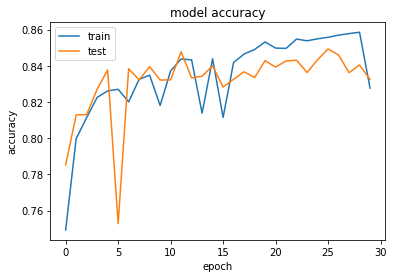

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

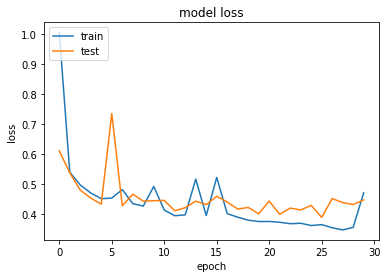

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()